In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF, noiseFilter, renameUnits, dropExcluded, computeBareTrapFrequencies, computeTrapFrequencies
from fit import fitDF, N_polarized_pure3b, N_polarized, N_linear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from parameters import *

In [2]:
label_heads = ['experiment', "ODTFactor"]

labels_TOF = [[['TOF', 4], [170028, 170087]],
              [['TOF', 4], [170099, 170168]]
    #[['TOF', 4], [170028, 170157]]
                ] # June 16th

# All is with 162 isotope
compz_not_lossy = 7.4
compz_lossy = 7.83

# They correspond to detuning from -70GHz to 0.5GHz while keeping the trap depth constant
# Cloud is hold for 500ms (7.4 field) or 50ms (7.83 field)
# initial atom number = 4.5e4 in both.

labels = [] 

excluded = [170162]

In [3]:
"""ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation', 'ODT3_Comp_final', 'dummy']
fitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df_TOF.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass
df_TOF.to_pickle('data_save_210616_latticeDetuning.pickle')"""

"ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation', 'ODT3_Comp_final', 'dummy']\nfitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']\n\ndf_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)\nfor column in df_TOF.columns:\n    try:\n        df_TOF[column] = df_TOF[column].astype(float)\n    except:\n        pass\ndf_TOF.to_pickle('data_save_210616_latticeDetuning.pickle')"

In [4]:
df_TOF = pd.read_pickle('data_save_210616_latticeDetuning.pickle')

#### Noise filtering
#df_TOF = noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = np.inf, yWidthMax = 100)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = 100, xWidthMin = 4,  yWidthMax = 100, yWidthMin = 4)

#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 3000, xWidthMax = 100, xWidthMin = 3,  yWidthMax = 100, yWidthMin = 3)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 6000, xWidthMax = 300, xWidthMin = 3,  yWidthMax = 300, yWidthMin = 3)



# add units and renames columns
# it add xWidth_um and the inversion between X and Y is performed
renameUnits(df_TOF, magnification = 4.38, cameraPixelSize = 6.5, axis = 'horizontal', experiment = 'TOF')

# Delete these row indexes from dataFrame
dropExcluded(df_TOF, excluded)

In [5]:
computeBareTrapFrequencies(df_TOF, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)

computeTrapFrequencies(df_TOF)

In [6]:
latticeDepthList = np.sort(df_TOF['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df_TOF['BECHoldTime'].unique())
latticeDetuningList = np.sort(df_TOF['latticeDetuning_GHz'].unique())
compzList = np.sort(df_TOF['compz'].unique())
ODTFactorList = np.sort(df_TOF['ODTFactor'].unique())
colors = ['red', 'blue', 'orange', 'black', 'green', 'pink', 'purple']

In [7]:
latticeDepthList

array([  2.24,   4.4 ,   8.6 ,  12.5 ,  19.8 ,  26.4 ,  35.  ,  57.  ,
        72.  ,  83.  ,  91.5 ,  98.  , 103.  ])

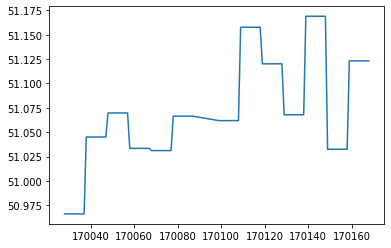

In [8]:
plt.figure()
plt.plot(df_TOF['imageID'], df_TOF['trapFrequencyZ_kHz'])
plt.show()

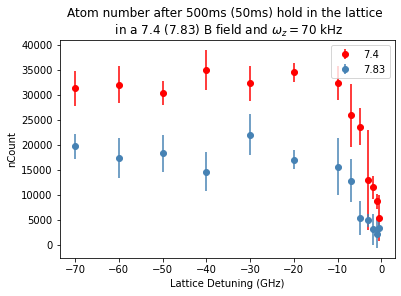

In [9]:
color = ['red', 'steelblue']
plt.figure()
for i, compz in enumerate([compz_not_lossy, compz_lossy]):
    df_temp = getSubDF(df_TOF, ['compz'], [compz]).groupby('latticeDetuning_GHz').mean().reset_index()
    df_temp_err = getSubDF(df_TOF, ['compz'], [compz]).groupby('latticeDetuning_GHz').agg(np.std) #.mean().reset_index()
    plt.errorbar(df_temp['latticeDetuning_GHz'], df_temp['nCount'], yerr = df_temp_err['nCount'], label = compz, fmt = 'o', color = color[i])
plt.legend()
plt.xlabel('Lattice Detuning (GHz)')
plt.ylabel('nCount')
plt.title('Atom number after 500ms (50ms) hold in the lattice \n in a 7.4 (7.83) B field and $\omega_z = 70$ kHz')
plt.savefig('latticeDetuningComparaison.jpg', dpi = 300)
plt.show()

In [10]:
df_temp = getSubDF(df_TOF, ['compz'], [compz]).groupby('latticeDetuning_GHz').agg(np.std)
df_temp

,BECHoldTime,TOF,latticeDepth_mW,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,xPos,...,imageID,ODTFactor,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
latticeDetuning_GHz,,,,,,,,,,,,,,,,,,,,,
-70.0,0.0,0.0,0.0,0.0,0.0,1.581139,2503.724865,3.042339,13.632756,3.094209,...,3.646917,0.0,20.231259,4.514886,0.0,0.0,0.0,0.0,0.0,0.0
-60.0,0.0,0.0,0.0,0.0,0.0,1.581139,3999.853335,2.906526,6.526775,2.758266,...,2.236068,0.0,9.685853,4.313338,0.0,0.0,0.0,0.0,0.0,0.0
-50.0,0.0,0.0,0.0,0.0,0.0,1.581139,3726.032944,20.738492,13.797389,9.742882,...,3.049590,0.0,20.475577,30.776301,0.0,0.0,0.0,0.0,0.0,0.0
-40.0,0.0,0.0,0.0,0.0,0.0,1.581139,3917.662186,2.343704,6.136954,2.117397,...,2.915476,0.0,9.107352,3.478099,0.0,0.0,0.0,0.0,0.0,0.0
-30.0,0.0,0.0,0.0,0.0,0.0,1.581139,4075.487051,5.731713,5.476548,1.017512,...,1.923538,0.0,8.127297,8.505968,0.0,0.0,0.0,0.0,0.0,0.0
-20.0,0.0,0.0,0.0,0.0,0.0,1.581139,1839.170411,4.395688,10.484659,2.860877,...,3.361547,0.0,15.559426,6.523281,0.0,0.0,0.0,0.0,0.0,0.0
-10.0,0.0,0.0,0.0,0.0,0.0,1.581139,5699.318056,4.081848,8.963235,3.671417,...,3.114482,0.0,13.301605,6.057538,0.0,0.0,0.0,0.0,0.0,0.0
-7.0,0.0,0.0,0.0,0.0,0.0,1.581139,4327.379091,4.042355,23.792176,5.886204,...,3.049590,0.0,35.308024,5.998929,0.0,0.0,0.0,0.0,0.0,0.0
-5.0,0.0,0.0,0.0,0.0,0.0,1.581139,3432.172592,15.346367,18.712561,8.948509,...,3.049590,0.0,27.769782,22.774288,0.0,0.0,0.0,0.0,0.0,0.0


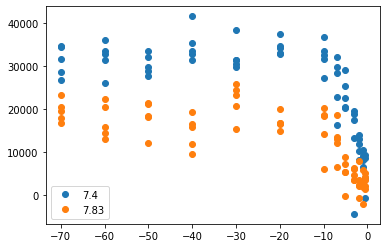

In [11]:
plt.figure()
for compz in [compz_not_lossy, compz_lossy]:
    df_temp = getSubDF(df_TOF, ['compz'], [compz])#.groupby('latticeDetuning_GHz').mean().reset_index()
    plt.plot(df_temp['latticeDetuning_GHz'], df_temp['nCount'], 'o', label = compz)
plt.legend()
plt.show()

In [12]:
def polarizability(detuning):
    polarizability_prefactor = 3*np.pi*kappa_red*epsilon_0*c**3*Gamma_741/(omega_741**3)
    polarizability = 220*polarizability_0-polarizability_prefactor/detuning
    return polarizability

def trapFrequency(detuning, power, beamwaist):
    polarizability_here = polarizability(detuning)
    omega_z = np.sqrt(np.abs(32*np.pi*polarizability_here*power/((741*10**(-9))**2*beamwaist**2*epsilon_0*c*m)))
    return omega_z

NameError: name 'trapFrequency_kHz_experiment' is not defined

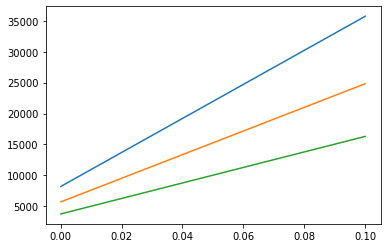

In [13]:
detuning = -np.linspace(10,10000, 10000)*2*np.pi*10**9
power = 0.0639
trapFrequencyZ_kHz_formula_27 = trapFrequency(detuning, power, beamwaist = 27*10**(-6))/(2*np.pi*10**3)
trapFrequencyZ_kHz_formula_32 = trapFrequency(detuning, power, beamwaist = 32.4*10**(-6))/(2*np.pi*10**3)
trapFrequencyZ_kHz_formula_40 = trapFrequency(detuning, power, beamwaist = 40*10**(-6))/(2*np.pi*10**3)
trapFrequencyZ_kHz_experiment = 132871*(-1/(detuning/(2*np.pi*10**9))) + 3415
plt.figure()
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyZ_kHz_formula_27)**2, label = 'formula w = 27um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyZ_kHz_formula_32)**2, label = 'formula w = 32um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyZ_kHz_formula_40)**2, label = 'formula w = 40um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), trapFrequency_kHz_experiment, label = 'Experiment')
plt.legend()
plt.show()

In [ ]:
40/32.4

Data of the transverse trap frequency

In [ ]:
latticeDetuning_exp = np.array([-50, -40, -30, -20, -10, -5])*2*np.pi*10**9 # in GHz at 
trapFrequency_exp = np.array([355, 375, 405, 450, 525, 850])/2*2*np.pi

def linear(x, a, b):
    return a*x + b
from scipy.optimize import curve_fit
X = -1/(latticeDetuning_exp/(2*np.pi*10**9))
popt, pcov = curve_fit(linear, -1/(latticeDetuning_exp/(2*np.pi*10**9)), (2*trapFrequency_exp)**2)

plt.figure()
plt.plot(X, (2*trapFrequency_exp)**2, 'o', label = 'data')
plt.plot(X, linear(X, popt[0], popt[1]), '--', label = 'fit')
plt.plot()
plt.show()
beamwaist = 32.4*10**(-6)
trapFrequencyZ_exp = trapFrequency_exp*np.sqrt(2)/(2*np.pi*beamwaist/(741*10**(-9)))

In [ ]:
trapFrequency(detuning, power, beamwaist = beamwaist)/(2*np.pi*aspectRatio)

In [ ]:
detuning = -np.linspace(10,10000, 10000)*2*np.pi*10**9
power = 0.0639

beamwaist = 27*10**(-6)
aspectRatio = (2*np.pi/(741*10**(-9))*beamwaist)/np.sqrt(2)
trapFrequencyPerp_Hz_formula_27 = trapFrequency(detuning, power, beamwaist = beamwaist)/(2*np.pi*aspectRatio)
beamwaist = 32.4*10**(-6)
aspectRatio = (2*np.pi/(741*10**(-9))*beamwaist)/np.sqrt(2)
trapFrequencyPerp_Hz_formula_32 = trapFrequency(detuning, power, beamwaist = beamwaist)/(2*np.pi*aspectRatio)
beamwaist = 40*10**(-6)
aspectRatio = (2*np.pi/(741*10**(-9))*beamwaist)/np.sqrt(2)
trapFrequencyPerp_Hz_formula_40 = trapFrequency(detuning, power, beamwaist = beamwaist)/(2*np.pi*aspectRatio)
trapFrequencyPerp_Hz_experiment = linear(-1/(detuning/(2*np.pi*10**9)), popt[0], popt[1])
plt.figure()
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyPerp_Hz_formula_27)**2, label = 'formula w = 27um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyPerp_Hz_formula_32)**2, label = 'formula w = 32um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), (2*trapFrequencyPerp_Hz_formula_40)**2, label = 'formula w = 40um')
plt.plot(-1/(detuning/(2*np.pi*10**9)), trapFrequencyPerp_Hz_experiment, label = 'Experiment')
plt.legend()
plt.show()

In [ ]:
beamwaist = 32.4*10**(-6)
aspectRatio = np.sqrt(2)/(2*np.pi*beamwaist/(741*10**(-9)))
1/aspectRatio

In [ ]:
220*np.sqrt(2)*(741*10**(-9))/(2*np.pi)